# Колико смо далеко од одрживог развоја?
У претходним лекцијама одељка о еколошком отиску бавили смо се (материјалним) благостањем нација израженим кроз индекс хуманог развоја, категорију просечних прихода становника и бруто домаћи производ (БДП) по становнику. Присетите се да смо ову последњу варијаблу прочистили јер је садржала доларску ознаку и зарез због којих је третирана као текстуална. У коригованој табели, ове вредности су квантитативне и односе се на просечан приход државе остварен производњом роба и услуга у домаћој економији. Неспорно је да индустрија и стварање адекватних услова за живот захтевају трошење природних ресурса. У наредним анализама ћемо се позабавити односима поменутих варијабли како бисмо видели да ли већи развој носи са собом и већи еколошки отисак. 
<BR><BR>
Најпре ћемо учитати кориговану табелу са подацима.

In [2]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Сада ћемо проверити да ли је већа економска развијеност земље повезана са већим благостањем њених становника, овога пута израженим кроз очекивану дужину животног века. Како бисмо детаљније анализирали природу те повезаности, претходно ћемо поделити државе у две категорије – оне у којима је очекивани животни век дужи од 72 године и оне у којима је краћи од 73. 

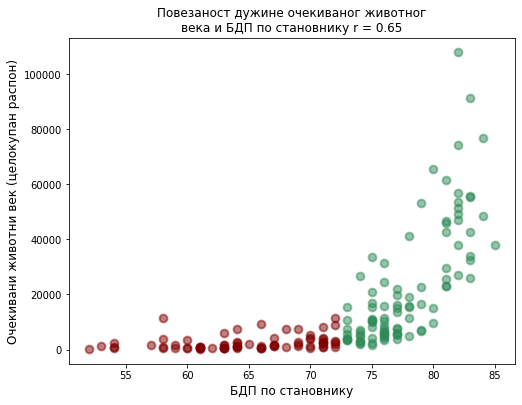

In [10]:
import matplotlib.pyplot as plt

# Дефинисање објекта figure 
fig = plt.figure(figsize=(8,6))

# Скуп држава са очекиваним животним веком грађана краћим од 72 године
kraLE = otisak[otisak['Life Expectancy'] < 73][['Life Expectancy', 'GDP per cap', 'Country']].sort_values('GDP per cap', ascending=False).copy()
# Скуп држава са очекиваним животним веком грађана дужим од 71 године
duzLE = otisak[otisak['Life Expectancy'] > 72][['Life Expectancy', 'GDP per cap', 'Country']].sort_values('GDP per cap', ascending=False).copy()

# На истом графикону цртамо оба скупа података различитим бојама
plt.scatter(x=kraLE['Life Expectancy'], y=kraLE['GDP per cap'], color='maroon', alpha=0.5, s=60, linewidth=2)
plt.scatter(x=duzLE['Life Expectancy'], y=duzLE['GDP per cap'], color='seagreen', alpha=0.5, s=60, linewidth=2)

# Рачунамо коефицијент корелације животног века и БДП
kor = otisak['Life Expectancy'].corr(otisak['GDP per cap'])

# Исписујемо наслов графикона и називе оса
plt.title('Повезаност дужине очекиваног животног\nвека и БДП по становнику r = ' + '%.2f' % kor, fontsize=12)
plt.ylabel('Очекивани животни век (целокупан распон)', fontsize=12)
plt.xlabel ('БДП по становнику', fontsize=12)

plt.show()

На горњем графикону приказана је повезаност БДП и дужине животног века за све државе. Кружиће смо учинили делимично провидним како би се јасније видело њихово „гомилање“ око блиских вредности. Видимо да је корелација релативно висока и да износи 0,65. Међутим, очигледно је да се интензитет везе разликује унутар две поткатегорије држава. Сада ћемо исцртати одвојене скатер дијаграме за две поткатегорије држава.

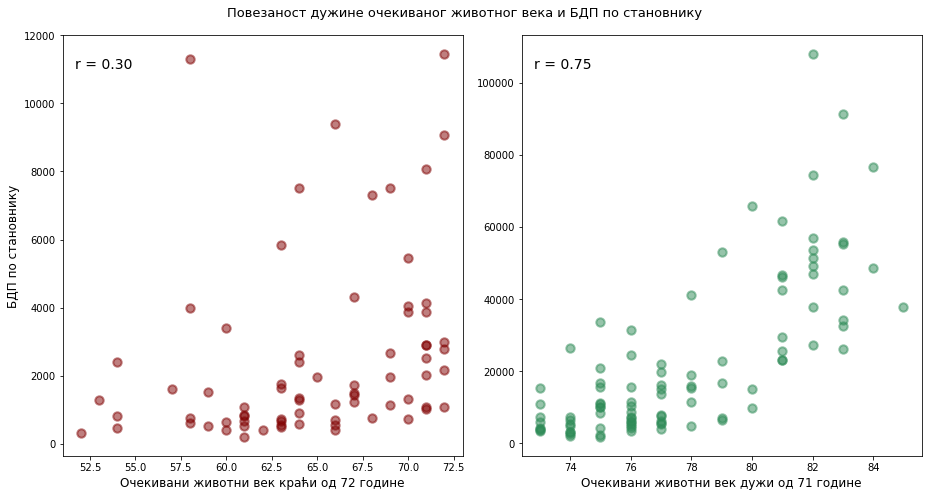

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,7))

# Скатер дијаграм за државе са краћим животним веком
ax1.scatter(x=kraLE['Life Expectancy'], y=kraLE['GDP per cap'], color='maroon', alpha=0.5, s=70, linewidth=2)

# Коефицијент корелације дужине животног века и БДП за прву групу
kor = kraLE['Life Expectancy'].corr(kraLE['GDP per cap'])

ax1.text(0.03, 0.92, 'r = ' + '%.2f' % kor, transform = ax1.transAxes, fontsize=14)
ax1.set_ylabel('БДП по становнику', fontsize=12)
ax1.set_xlabel('Очекивани животни век краћи од 72 године', fontsize=12)

# Скатер дијаграм за државе са дужим животним веком
ax2.scatter(x=duzLE['Life Expectancy'], y=duzLE['GDP per cap'], color='seagreen', alpha=0.5, s=70, linewidth=2)

# Коефицијент корелације дужине животног века и БДП за другу групу
kor = duzLE['Life Expectancy'].corr(duzLE['GDP per cap'])

ax2.text(0.03, 0.92, 'r = ' + '%.2f' % kor, transform = ax2.transAxes, fontsize=14)
ax2.set_xlabel('Очекивани животни век дужи од 71 године', fontsize=12)

# Овде уметните кôд за обележавање тачкица. Приликом формирања скупова kraLE и duzLE сортирали смо државе по 
# опадајућим вредностима БДП-а како бисмо могли да издвојимо само неколико аберантних резултата на графикону.

fig.suptitle('Повезаност дужине очекиваног животног века и БДП по становнику', fontsize=13)

fig.tight_layout()


Приказали смо исте корелације као и на претходном графикону, али појединачно за државе одређене категорије. Имајте на уму да су се распони оса изменили у складу са распонима вредности, али однос и распршење зелених, односно црвених тачкица је потпуно исти на доњим графиконима, као и на горњем. Видимо да је корелација у црвеној групи знатно нижа, док је у зеленој заправо виша него на укупном узорку. Овај феномен је у статистици познат као __[*Симпсонов парадокс*](https://en.wikipedia.org/wiki/Simpson%27s_paradox)__ и обично настаје као последица ограничавања распона неке варијабле. Приликом рачунања корелације варијабли увек треба обратити пажњу на то да ли закључак који је донет на укупном узорку важи и за сваки подузорак испитаника. У томе нам, наравно, највише помаже дијаграм распршења.  

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>На црвеном графикону постоји држава која има аберантну позицију и која се може сматрати аутлајером. Због ње је коефицијент корелације вероватно нижи него што би био када би се уклонила. Покушајте да измените услов за формирање скупа <i>kraLE</i> тако да ова држава буде искључена из анализе.</div>

<div class="alert alert-block alert-info"><img src="slike/down.png" align="left"/>Пронађите начин да додате називе држава уз тачкице на графикону да бисте видели која држава је аутлајер. Као полазна основа може да вам послужи <a href='https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point' target='_blank'>овај чланак</a>. Ако се не снађете, искористите кôд из решења у ћелији испод

<details>
<summary><img src="slike/click.png" align="right" width="70"/>
<b>Кликните овде како бисте видели решење</b>
</summary>
    <code>
nazivi = kraLE['Country'].head(10)
for i, label in enumerate(nazivi):
    ax3.annotate(label, (kraLE['Life Expectancy'][i], kraLE['GDP per cap'][i]))
   </code><code>
nazivi = duzLE['Country'].head(10)
for i, label in enumerate(nazivi):
    ax4.annotate(label, (duzLE['Life Expectancy'][i], duzLE['GDP per cap'][i]))
</code>

Погледајмо сада у каквом је односу БДП са индексом хуманог развоја и укупним еколошким отиском.

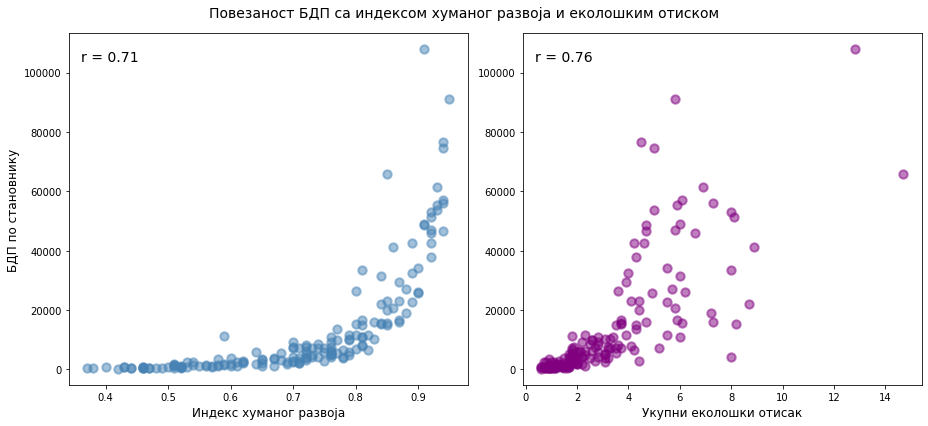

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))

# Искључујемо државе код којих је вредност HDI 0, очигледно због грешке у подацима
otisakHDI = otisak[otisak['HDI'] > 0].copy()

ax1.scatter(x=otisakHDI['HDI'], y=otisakHDI['GDP per cap'], color='steelblue', alpha=0.5, s=70, linewidth=2)
kor = otisakHDI['HDI'].corr(otisakHDI['GDP per cap'])
ax1.text(0.03, 0.92, 'r = ' + '%.2f' % kor, transform = ax1.transAxes, fontsize=14)
ax1.set_ylabel('БДП по становнику', fontsize=12)
ax1.set_xlabel('Индекс хуманог развоја', fontsize=12)

ax2.scatter(x=otisakHDI['Total Ecological Footprint'], y=otisakHDI['GDP per cap'], color='purple', alpha=0.5, s=70, linewidth=2)
kor = otisakHDI['Total Ecological Footprint'].corr(otisakHDI['GDP per cap'])
ax2.text(0.03, 0.92, 'r = ' + '%.2f' % kor, transform = ax2.transAxes, fontsize=14)
ax2.set_xlabel('Укупни еколошки отисак', fontsize=12)

fig.suptitle('Повезаност БДП са индексом хуманог развоја и еколошким отиском', fontsize=14)
fig.tight_layout()

Познато је да се вредност БДП по становнику __[не може сматрати мером благостања нације](https://hbr.org/2019/10/gdp-is-not-a-measure-of-human-well-being)__. То је посебно очигледно на плавом графикону у групи држава са нижим индексом хуманог развоја. Једно од могућих објашњења је делатност страних компанија које остварују профит на територији неке државе, али релативно мали проценат тог профита завршава код становника те државе. Са друге стране, чини се да је већа економска активност повезана са већим еколошким отиском, мада и у овом случају треба обратити пажњу на аберантне резултате на љубичастом графикону.

<div class="alert alert-block alert-info"><img src="slike/down.png" align="left"/>Покушајте да процените колика је корелација индекса хуманог развоја и дужине животног века на основу изгледа плавог и црвено-зеленог графикона. Пратећи упутство у <a href='https://pandas.pydata.org/pandas-docs/version/1.1.5/user_guide/style.html' target='_blank'>овом тексту</a> направите стилизовану корелациону матрицу варијабли које смо до сада описали да бисте проверили тачност процене. Упоредите своје решење са кодом у ћелији испод

<details>
<summary><img src="slike/click.png" align="right" width="70"/>
<b>Кликните овде како бисте видели решење</b>
</summary>
    <code>
import seaborn as sbrn
        </code><code>
otisakKor = otisak[otisak['HDI'] > 0][['Total Ecological Footprint', 'HDI', 'GDP per cap', 'Life Expectancy', 'Population (mil)']].copy()
    <code>
otisakKor.set_axis(['Отисак', 'ИХР', 'БДП', 'Жив. век', 'Бр. стан.'], axis=1, inplace=True)
kore = otisakKor[['Отисак', 'ИХР', 'БДП', 'Жив. век', 'Бр. стан.']].corr()
    </code><code>
cm = sbrn.light_palette("seagreen", as_cmap=True)
kore.style.background_gradient(cmap=cm).format("{:.2f}")
</code>

Одрживи развој подразумева развој друштва у коме се људске потребе задовољавају расположивим природним ресурсима. Тиме се осигурава дугорочно постојање људског друштва уз очување животне средине и биокапацитета планете. Према проценама организације чије податке користимо у овом одељку, човечанству су уз садашњу потрошњу биокапацитета потребне 1,73 планете Земље. То значи да трошимо природне ресурсе готово дупло брже него што природа успева да их обнови.

У последњем примеру приказаћемо повезаност индекса хуманог развоја и броја потребних Земаља, како бисмо утврдили које државе су успешније, а које мање успешне у остваривању циљева одрживог развоја. Овога пута ћемо употребити посебну врсту дијаграма распршења у коме се, уз вредности две варијабле на осама, приказује и трећа варијабла као величина круга. Због тога је овај графикон познат и као *мехурасти дијаграм* (енгл. *bubble chart*). У нашем примеру, величину кругова ћемо дефинисати на основу броја становника сваке државе, тј. варијабле *Population (mil)*. 

In [6]:
import plotly.express as px

# Мењамо називе региона и објединјујемо европске државе (EU-28 и Other Europe)
otisakHDI.replace({'EU-28': 'Европа', 
                     'Other Europe': 'Европа',
                     'Africa': 'Африка',
                     'Asia-Pacific': 'Азија-Пацифик',
                     'North America': 'Северна Америка',
                     'South America': 'Јужна Америка',
                     'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                     'Central America/Caribbean': 'Централна Америка'
                    }, inplace=True)

# Исцртавамо скатер као мехурасти дијаграм у коме је величина круга дефинисана варијаблом Population (mil)
graf = px.scatter(otisakHDI, x='HDI', y='Number of Earths required',
                    size='Population (mil)', size_max=50,
                    color='Region', hover_name='Country',
                    template='plotly_white', width=800, height=500,
                    range_x=[0.3,1], range_y=[0,6]
                   )

# Референтна вредност за број планета
graf.add_hline(y=1, line_width=0.5, line_dash='dot', line_color='green') 

# Референтна вредност високох индекса хуманог развоја
graf.add_vline(x=0.7, line_width=0.5, line_dash='dot', line_color='green') 

# Квадрант одрживог развоја
graf.add_hrect(y0=0, y1=1, x0=(0.7-0.3)/0.7, x1=1, line_width=0, fillcolor='green', opacity=0.2) 

graf.update_layout(margin=dict(l=60, r=20, t=30, b=60), 
                   legend=dict(title='Регион', y=0.99, x=0.05, bgcolor='rgba(0,0,0,0)'),
                   xaxis_title='Индекс хуманог развоја', yaxis_title='Број потребних планета'
                  )

# Исписивање текста у квадранту глобалног одрживог развоја
graf.add_annotation(dict(font=dict(color='green',size=13),
                         x=0.97, y=0.35, xanchor='right', yanchor='bottom',
                         showarrow=False, text='Квадрант глобалног одрживог развоја'
                        )
                   )

graf.show()

На графикону су линијама означене две референтне вредности. Прва је вертикална линија изнад вредности 0,7 која се сматра границом високог индекса хуманог развоја, а друга је хоризонтална линија наспрам вредности 1 која означава да потрошња државе одговара тренутним биокапацитетима планете Земље. Доњи десни правоугаоник ограничен овим линијама представља тзв. *квадрант одрживог развоја*. Видимо да се само неколико држава налази у овом квадранту или близу њега. Већина је или у доњем левом или у горњем десном квадранту. Прву групу чине државе, углавном оне са афричког континента, које имају ниске вредности еколошког отиска, али и ниске вредности индекса хуманог развоја. У другој групи се налази САД и већина високо развијених европских држава које уједно имају и изузетно велику потршњу биокапацитета. На основу вредности на графикону можемо да видимо да би нам било потребно чак 4 до 6 планета када бисмо сви живели као грађани САД, Канаде, Аустралије или Уједињених Арапских Емирата.  

<div class="alert alert-block alert-info"><img src="slike/down.png" align="left"/>Да ли бисте рекли да је величина популације, односно број становника неке државе, повезан са њеним развојем или еколошким отиском? Одговор на ово питање можете да добијете ако употребите код приказан у решењу испод

<details>
<summary><img src="slike/click.png" align="right" width="70"/>
<b>Кликните овде како бисте видели решење</b>
</summary>
    <code>
import seaborn as sbrn
        </code><code>
otisakKor = otisak[otisak['HDI'] > 0][['Total Ecological Footprint', 'HDI', 'GDP per cap', 'Life Expectancy', 'Population (mil)']].copy()
    <code>
otisakKor.set_axis(['Отисак', 'ИХР', 'БДП', 'Жив. век', 'Бр. стан.'], axis=1, inplace=True)
kore = otisakKor[['Отисак', 'ИХР', 'БДП', 'Жив. век', 'Бр. стан.']].corr()
    </code><code>
cm = sbrn.light_palette("seagreen", as_cmap=True)
kore.style.background_gradient(cmap=cm).format("{:.2f}")
</code>

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Да смо као почетну тачку квадранта одрживог развоја на x-оси (<b>x0</b>) поставили вредност 0.7, правоугаоник не би био правилно исцртан. Уместо тога, координате смо израчунали као вредност израза <b>(0.7-0.3)/0.7</b>. Да ли можете да откријете како смо дошли до њега? Обратите пажњу на дефинисани распон вредности x-осе.</div>

**Колико смо далеко од одрживог развоја?**

На основу последњег графикона који смо нацртали, могло би се рећи да је већина држава далеко од глобалног одрживог развоја. Одступање се уочава у два смера. Први се односи на групу држава које немају велики еколошки отисак, али ни довољно висок индекс хуманог развоја. Другу групу чине државе које су економски развијене, али имају и веома висок еколошки дефицит.